In [5]:
import os
import pandas as pd
import librosa
from tqdm import tqdm

METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/filtered_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 22050 * 30  # Minimum required samples, e.g., 30 seconds at 22050 Hz

def downsample_tracks(metadata_path, downsample_ratios):
    """
    Downsamples tracks for each genre according to specified ratios in metadata only.

    Parameters:
        metadata_path (str): Path to the custom metadata CSV file.
        downsample_ratios (dict): Dictionary with genres as keys and downsampling factors (0-1) as values.

    Returns:
        DataFrame: Downsampled DataFrame of tracks.
    """
    # Load the metadata file
    tracks = pd.read_csv(metadata_path, index_col=0)

    # Initialize an empty list to store downsampled DataFrames
    downsampled_dfs = []

    # Loop through each genre and apply downsampling
    for genre, ratio in downsample_ratios.items():
        genre_tracks = tracks[tracks['primary_genre'] == genre]

        # Downsample if ratio < 1, otherwise keep all tracks
        if ratio < 1:
            num_samples = int(len(genre_tracks) * ratio)
            genre_tracks_downsampled = genre_tracks.sample(num_samples, random_state=42)
            print(f"Downsampled {genre} from {len(genre_tracks)} to {len(genre_tracks_downsampled)} tracks")
        else:
            genre_tracks_downsampled = genre_tracks
            print(f"Kept all tracks for {genre} (total: {len(genre_tracks)})")

        downsampled_dfs.append(genre_tracks_downsampled)

    # Combine all downsampled DataFrames
    downsampled_tracks = pd.concat(downsampled_dfs)

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after downsampling:")
    print(downsampled_tracks['primary_genre'].value_counts())

    return downsampled_tracks

# Define downsampling ratios for each genre
# downsample_ratios = {
#     'Electronic': 0.078,
#     'Avant-Garde': 0.175,
#     'Experimental': 0.2,
#     'Rock': 0.225,
#     'Pop': 0.26,
#     'Folk': 0.35,
#     'Hip-Hop': 0.37,
#     'Punk': 0.42,
#     'Noise': 0.44,
#     'Lo-Fi': 0.55,
#     'Experimental Pop': 0.55,
#     'Ambient Electronic': 0.74,
#     'Jazz': 0.86,
#     'Classical': 0.90,
#     'International': 0.95,
#     'Blues': 1.0,  # Keep all for Blues
# }
downsample_ratios = {'Classical': 0.155763,
'Blues' :0.151057,
'Hip-Hop' :0.048900,
'Ambient' :0.033501,
'Noise' :0.034843,
'Field Recordings' :0.085985,
'Old-Time / Historic' :0.534759,
'Techno' :0.158730,
'Jazz' :0.160000,
'Country' :0.341297,
'Drone' :0.134409,
'Chiptune' :0.352113,
'Garage' :0.129366,
'Soul-RnB' :0.591716,
'Reggae - Dub' :0.347222,
'Punk' :0.059137,
}




# Perform downsampling
downsampled_tracks = downsample_tracks(METADATA_PATH, downsample_ratios)

# Optional: Save the downsampled data to a new CSV
downsampled_tracks.to_csv('downsampled_tracks_metadata.csv')





Downsampled Classical from 642 to 99 tracks
Downsampled Blues from 662 to 99 tracks
Downsampled Hip-Hop from 2045 to 100 tracks
Downsampled Ambient from 2985 to 100 tracks
Downsampled Noise from 2870 to 99 tracks
Downsampled Field Recordings from 1172 to 100 tracks
Downsampled Old-Time / Historic from 187 to 99 tracks
Downsampled Techno from 630 to 99 tracks
Downsampled Jazz from 625 to 100 tracks
Downsampled Country from 293 to 100 tracks
Downsampled Drone from 744 to 100 tracks
Downsampled Chiptune from 284 to 100 tracks
Downsampled Garage from 773 to 99 tracks
Downsampled Soul-RnB from 169 to 100 tracks
Downsampled Reggae - Dub from 288 to 99 tracks
Downsampled Punk from 1691 to 100 tracks

Number of tracks per genre after downsampling:
primary_genre
Hip-Hop                100
Ambient                100
Field Recordings       100
Jazz                   100
Country                100
Drone                  100
Chiptune               100
Soul-RnB               100
Punk                

In [1]:
import pandas as pd
import os
import librosa
from tqdm import tqdm

# Paths and settings
METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata/custom_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 12000 * 30  # Set the minimum sample threshold (e.g., 30 seconds at 22050 Hz)

def filter_short_tracks(metadata_path, dataset_path, min_samples):
    """
    Filters out tracks with a sample count less than the specified threshold.

    Parameters:
        metadata_path (str): Path to the metadata CSV file.
        dataset_path (str): Path to the directory with audio files.
        min_samples (int): Minimum number of samples required for a track to be included.

    Returns:
        DataFrame: Filtered DataFrame of tracks.
    """
    # Load metadata
    tracks = pd.read_csv(metadata_path, index_col=0)

    # List to store valid track IDs
    valid_tracks = []

    # Progress bar for filtering
    print("Filtering tracks by minimum sample requirement...")
    for track_id in tqdm(tracks.index, desc="Checking track length"):
        folder = f"{int(track_id):03d}"[:3]  # Folder based on track_id
        file_path = os.path.join(dataset_path, folder, f"{track_id}.mp3")

        if os.path.isfile(file_path):
            try:
                # Load audio file and check length
                signal, _ = librosa.load(file_path, sr=None)
                if len(signal) >= min_samples:
                    valid_tracks.append(track_id)  # Track meets minimum sample requirement
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Filter metadata to include only valid tracks
    filtered_tracks = tracks.loc[valid_tracks]

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after filtering:")
    print(filtered_tracks['primary_genre'].value_counts())

    return filtered_tracks

# Apply filtering
filtered_tracks = filter_short_tracks(METADATA_PATH, DATASET_PATH, MIN_SAMPLES)

# Optional: Save the filtered data to a new CSV
filtered_tracks.to_csv('filtered_tracks_metadata.csv')
print("Filtered metadata saved to 'filtered_tracks_metadata.csv'.")


Filtering tracks by minimum sample requirement...


Checking track length:  62%|████████████████████████████████▏                   | 25073/40549 [00:40<01:30, 170.70it/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_5996\3680279564.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, _ = librosa.load(file_path, sr=None)
C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Checking track length:  63%|█████████████████████████████████▎                   | 25483/40549 [01:00<03:00, 83.61it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106409.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106412.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106415.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\106\106628.mp3: 


Checking track length:  65%|██████████████████████████████████▍                  | 26312/40549 [01:40<06:54, 34.38it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\108\108920.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\108\108925.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\109\109266.mp3: 


Checking track length:  70%|█████████████████████████████████████▏               | 28454/40549 [03:21<10:27, 19.29it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\115\115610.mp3: 


Checking track length:  79%|██████████████████████████████████████████           | 32186/40549 [06:24<07:39, 18.18it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\129\129207.mp3: 


Checking track length:  80%|██████████████████████████████████████████▎          | 32329/40549 [06:31<07:13, 18.95it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\129\129800.mp3: 


Checking track length:  81%|██████████████████████████████████████████▊          | 32791/40549 [06:54<06:58, 18.54it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\130\130748.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\130\130751.mp3: 


Checking track length:  83%|███████████████████████████████████████████▉         | 33636/40549 [07:36<05:48, 19.85it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\133\133297.mp3: 


Checking track length:  83%|████████████████████████████████████████████▏        | 33818/40549 [07:45<05:57, 18.82it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\133\133641.mp3: 


Checking track length:  83%|████████████████████████████████████████████▏        | 33824/40549 [07:45<05:56, 18.85it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\133\133647.mp3: 


Checking track length:  84%|████████████████████████████████████████████▋        | 34231/40549 [08:05<05:33, 18.97it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\134\134887.mp3: 


Checking track length:  90%|███████████████████████████████████████████████▍     | 36303/40549 [09:50<03:41, 19.14it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\142\142614.mp3: 


Checking track length:  91%|████████████████████████████████████████████████▏    | 36863/40549 [10:19<03:13, 19.04it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\143\143992.mp3: 


Checking track length:  91%|████████████████████████████████████████████████▎    | 36970/40549 [10:24<03:06, 19.17it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\144\144518.mp3: 


Checking track length:  94%|█████████████████████████████████████████████████▉   | 38190/40549 [11:26<02:06, 18.59it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\147\147419.mp3: 


Checking track length:  94%|█████████████████████████████████████████████████▉   | 38196/40549 [11:27<02:06, 18.54it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\147\147424.mp3: 


Checking track length:  98%|███████████████████████████████████████████████████▊ | 39664/40549 [12:43<00:43, 20.18it/s]

Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\151\151920.mp3: 


Checking track length: 100%|█████████████████████████████████████████████████████| 40549/40549 [13:28<00:00, 50.15it/s]


Number of tracks per genre after filtering:
primary_genre
Ambient                2985
Noise                  2870
Hip-Hop                2045
Punk                   1691
Field Recordings       1172
Garage                  773
Drone                   744
Blues                   662
Classical               642
Techno                  630
Jazz                    625
Country                 293
Reggae - Dub            288
Chiptune                284
Old-Time / Historic     187
Soul-RnB                169
Name: count, dtype: int64
Filtered metadata saved to 'filtered_tracks_metadata.csv'.


In [ ]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Paths for GTZAN dataset
DATASET_PATH = 'C:/Users/HASSAN/Downloads/archive/Data/genres_original'  # Should contain genre folders
JSON_PATH = "data_gtzan.json"
SAMPLE_RATE = 22050  # Standard for GTZAN
TRACK_DURATION = 30  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
# GTZAN genre list
GTZAN_GENRES = [
    'blues',
    'classical',
    'country',
    'disco',
    'hiphop',
    'jazz',
    'metal',
    'pop',
    'reggae',
    'rock'
]

def print_genre_counts(dataset_path):
    """Count number of files per genre in GTZAN dataset"""
    genre_counts = {}
    for genre in GTZAN_GENRES:
        genre_path = os.path.join(dataset_path, genre)
        if os.path.exists(genre_path):
            num_files = len([f for f in os.listdir(genre_path) if f.endswith('.wav')])
            genre_counts[genre] = num_files
    print("\nNumber of tracks per genre:")
    for genre, count in genre_counts.items():
        print(f"{genre}: {count}")

def save_features(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """
    Extract features from GTZAN dataset and save to json file
    """
    data = {
        "mapping": GTZAN_GENRES,
        "labels": [],
        "mfcc": [],
        "other_features": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Process each genre folder
    for genre_idx, genre in enumerate(GTZAN_GENRES):
        genre_path = os.path.join(dataset_path, genre)
        if not os.path.exists(genre_path):
            continue
            
        # Get all WAV files in genre folder
        files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
        
        with tqdm(total=len(files), desc=f"Processing {genre}", unit="file") as pbar:
            for file in files:
                file_path = os.path.join(genre_path, file)
                
                try:
                    # Load audio file
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    
                    # Ensure audio is 30 seconds by padding/trimming
                    if len(signal) < SAMPLES_PER_TRACK:
                        signal = np.pad(signal, (0, SAMPLES_PER_TRACK - len(signal)), mode='constant')
                    else:
                        signal = signal[:SAMPLES_PER_TRACK]
                    
                    # Process segments
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        segment = signal[start:finish]
                        
                        # Extract MFCCs
                        mfcc = librosa.feature.mfcc(y=segment, sr=sample_rate,
                                                  n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        
                        # Extract other features (using your original feature extraction)
                        other_features = extract_other_features(segment, sample_rate)
                        
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["other_features"].append(other_features)
                            data["labels"].append(genre_idx)
                        else:
                            print(f"Skipping segment {d} in {file_path} due to unexpected MFCC shape.")
                    
                    pbar.update(1)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
    print(f"\nFeatures saved to {json_path}")

def extract_other_features(segment, sample_rate):
    """Helper function to extract all non-MFCC features (original features from your code)"""
    features = []
    
    # Pitch (Yin algorithm) - from original code
    try:
        f0 = librosa.yin(segment, fmin=20, fmax=sample_rate//2)
        f0 = f0[f0 > 0]  # Remove zeros
        features.append(float(np.mean(f0)) if len(f0) > 0 else 0.0)
    except:
        features.append(0.0)
    
    # Tempo - from original code
    onset_env = librosa.onset.onset_strength(y=segment, sr=sample_rate)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    features.append(float(tempo))
    
    # Beats (mean interval) - from original code
    _, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    beats = librosa.frames_to_time(beats, sr=sample_rate)
    if len(beats) > 1:
        features.append(float(np.mean(np.diff(beats))))
    else:
        features.append(0.0)
    
    # Rhythm patterns - from original code
    stft = librosa.stft(segment, n_fft=2048, hop_length=512)
    magnitude = np.abs(stft)
    NUM_RHYTHM_BANDS = 6
    band_indices = np.linspace(0, magnitude.shape[0], NUM_RHYTHM_BANDS + 1, dtype=int)
    energy_bands = np.zeros((NUM_RHYTHM_BANDS, magnitude.shape[1]))
    for b in range(NUM_RHYTHM_BANDS):
        energy_bands[b] = np.sum(magnitude[band_indices[b]:band_indices[b+1]], axis=0)
    rhythm_features = []
    for b in range(NUM_RHYTHM_BANDS):
        autocorr = np.correlate(energy_bands[b], energy_bands[b], mode='full')
        rhythm_features.extend(autocorr[len(autocorr)//2:])  # Keep non-negative lags
    features.extend(rhythm_features)
    
    # Chroma features (mean) - from original code
    chroma = librosa.feature.chroma_stft(y=segment, sr=sample_rate, n_fft=2048, hop_length=512)
    features.extend(np.mean(chroma, axis=1).tolist())
    
    # RMS dynamics - from original code
    rms = librosa.feature.rms(y=segment, frame_length=2048, hop_length=512)[0]
    features.append(float(np.mean(rms)))
    features.append(float(np.std(rms)))
    features.append(float((np.max(rms) - np.min(rms)) / (np.max(rms) + 1e-10)))
    
    return features

def load_data(data_path):
    """Load data from json file"""
    with open(data_path, "r") as fp:
        data = json.load(fp)
    
    X_mfcc = np.array(data["mfcc"])
    X_other = np.array(data["other_features"])
    y = np.array(data["labels"])
    return X_mfcc, X_other, y

def prepare_datasets(test_size, validation_size):
    """Prepare train, validation, and test sets with augmentation"""
    # Load data
    X_mfcc, X_other, y = load_data(JSON_PATH)
    
    # Split data
    (X_mfcc_train, X_mfcc_test, 
     X_other_train, X_other_test, 
     y_train, y_test) = train_test_split(X_mfcc, X_other, y, test_size=test_size, stratify=y)
    
    (X_mfcc_train, X_mfcc_val, 
     X_other_train, X_other_val, 
     y_train, y_val) = train_test_split(X_mfcc_train, X_other_train, y_train, 
                                      test_size=validation_size, stratify=y_train)

    # Data Augmentation - same as original
    # Reverse MFCCs
    X_mfcc_train_reversed = np.flip(X_mfcc_train, axis=1)
    y_train_reversed = y_train.copy()
    
    # Time shifting
    max_shift = int(0.1 * X_mfcc_train.shape[1])
    X_mfcc_train_shifted = []
    X_other_train_shifted = []
    y_train_shifted = []
    
    for i in range(X_mfcc_train.shape[0]):
        shift = np.random.randint(1, max_shift)
        shifted_mfcc = np.roll(X_mfcc_train[i], shift, axis=1)
        X_mfcc_train_shifted.append(shifted_mfcc)
        X_other_train_shifted.append(X_other_train[i])  # Other features don't get shifted
        y_train_shifted.append(y_train[i])
    
    X_mfcc_train_shifted = np.array(X_mfcc_train_shifted)
    X_other_train_shifted = np.array(X_other_train_shifted)
    y_train_shifted = np.array(y_train_shifted)
    
    # Combine original and augmented data
    X_mfcc_train_augmented = np.concatenate(
        (X_mfcc_train, X_mfcc_train_reversed, X_mfcc_train_shifted), axis=0)
    X_other_train_augmented = np.concatenate(
        (X_other_train, X_other_train, X_other_train_shifted), axis=0)
    y_train_augmented = np.concatenate(
        (y_train, y_train_reversed, y_train_shifted), axis=0)
    
    # Shuffle
    indices = np.arange(X_mfcc_train_augmented.shape[0])
    np.random.shuffle(indices)
    X_mfcc_train_augmented = X_mfcc_train_augmented[indices]
    X_other_train_augmented = X_other_train_augmented[indices]
    y_train_augmented = y_train_augmented[indices]
    
    # Normalize other features
    scaler = StandardScaler()
    X_other_train_augmented = scaler.fit_transform(X_other_train_augmented)
    X_other_val = scaler.transform(X_other_val)
    X_other_test = scaler.transform(X_other_test)
    
    # Add channel dimension to MFCCs
    X_mfcc_train_augmented = X_mfcc_train_augmented[..., np.newaxis]
    X_mfcc_val = X_mfcc_val[..., np.newaxis]
    X_mfcc_test = X_mfcc_test[..., np.newaxis]
    
    return (X_mfcc_train_augmented, X_other_train_augmented), \
           (X_mfcc_val, X_other_val), \
           (X_mfcc_test, X_other_test), \
           y_train_augmented, y_val, y_test

if __name__ == "__main__":
    # Print genre counts
    print_genre_counts(DATASET_PATH)
    
    # Save features
    save_features(DATASET_PATH, JSON_PATH, num_segments=10)
    
    # Prepare datasets
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)


Number of tracks per genre:
blues: 100
classical: 100
country: 100
disco: 100
hiphop: 100
jazz: 100
metal: 100
pop: 100
reggae: 100
rock: 100


Processing blues:   0%|                                                                      | 0/100 [00:00<?, ?file/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_10384\2208384990.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))
Processing country:  93%|██████████████████████████████████████████████████████▊    | 93/100 [00:55<00:04,  1.66file/s]

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras


def build_hybrid_model(mfcc_shape, other_features_shape, num_classes=10):
    """Hybrid model with original CNN structure for MFCCs and Dense network for other features"""
    # --- CNN Branch (MFCCs) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # Original CNN architecture
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Flatten()(x)
    
    # --- Dense Branch (Other Features) ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    # Layer 1
    y = Dense(64)(other_input)
    y = BatchNormalization()(y)  # BN before activation
    y = Activation('relu')(y)
    y = Dropout(0.2)(y)
    
    # Layer 2 
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.3)(y)
    
    # Layer 3
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.4)(y)
    
    # --- Combine Branches ---
    combined = Concatenate()([x, y])
    
    # Final classification layers
    z = Dense(256, activation='relu')(combined)
    z = Dropout(0.5)(z)
    output = Dense(num_classes, activation='softmax')(z)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = [
    'blues',
    'classical',
    'country',
    'disco',
    'hiphop',
    'jazz',
    'metal',
    'pop',
    'reggae',
    'rock'
]

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 130, 13, 1)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_6 (Reshape)           │ (None, 130, 13, 1)        │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 130, 13, 64)       │             640 │ reshape_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 798)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 65, 7, 64)         │               0 │ conv2d_12[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 64)                │          51,136 │ other_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_22        │ (None, 65, 7, 64)         │             256 │ max_pooling2d_12[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_25        │ (None, 64)                │             256 │ dense_16[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_26 (Dropout)          │ (None, 65, 7, 64)         │               0 │ batch_normalization_22[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_8 (Activation)     │ (None, 64)                │               0 │ batch_normalization_25[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_13 (Conv2D)            │ (None, 65, 7, 128)        │          73,856 │ dropout_26[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_29 (Dropout)          │ (None, 64)                │               0 │ activation_8[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_13              │ (None, 33, 4, 128)        │               0 │ conv2d_13[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 128)               │           8,320 │ dropout_29[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_23        │ (None, 33, 4, 128)        │             512 │ max_pooling2d_13[0][0]     │
│ (BatchNormalization)          │                           │               

 Total params: 1,368,394 (5.22 MB)

 Trainable params: 1,367,114 (5.22 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


677/677 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - accuracy: 0.2561 - loss: 2.5140 - val_accuracy: 0.3736 - val_loss: 1.8130
Epoch 2/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.4227 - loss: 1.5947 - val_accuracy: 0.4050 - val_loss: 1.7180
Epoch 3/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.4763 - loss: 1.4374 - val_accuracy: 0.4584 - val_loss: 1.5879
Epoch 4/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.5256 - loss: 1.3151 - val_accuracy: 0.5086 - val_loss: 1.4972
Epoch 5/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.5520 - loss: 1.2342 - val_accuracy: 0.5400 - val_loss: 1.3576
Epoch 6/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.5862 - loss: 1.1647 - val_accuracy: 0.6013 - val_loss: 1.2036
Epoch 7/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.6047 - loss: 1.1032 - val_accuracy: 0.6013 - val_loss: 1.1381
Epoch 8/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.6290 - loss: 1.0453 - val_

In [ ]:
target_genres = [
    'blues',
    'classical',
    'country',
    'disco',
    'hiphop',
    'jazz',
    'metal',
    'pop',
    'reggae',
    'rock'
]
unique_classes = np.unique(y_test)
print(f"Unique classes in test set: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")
# Predict a sample from the test set
sample_idx = 100  # Example index

# For hybrid model (two inputs)
X_mfcc_to_predict = X_mfcc_test[sample_idx]  # MFCC features 
X_other_to_predict = X_other_test[sample_idx]  # Other features
y_to_predict = y_test[sample_idx]

# Use your existing predict function
predict(model, X_mfcc_to_predict, X_other_to_predict, y_to_predict)

# To show genre names instead of indices:
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]
print(f"True Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(model.predict([
    X_mfcc_to_predict[np.newaxis, ...],
    X_other_to_predict[np.newaxis, ...]
]), axis=1)[0]]}")

import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# Generate predictions for the test set (for hybrid model)
y_pred = model.predict([X_mfcc_test, X_other_test])  # Pass both inputs
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Larger size for readability
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Adjust layout and labels
plt.title(f"Genre Classification Results\nAccuracy: {accuracy:.2%}", pad=20, fontsize=14)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()  # Prevent label cutoff
plt.show()



# Optional: Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=genre_labels))

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape,
                                    Bidirectional, GRU, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

def build_hybrid_parallel_model(mfcc_shape, other_features_shape, num_classes=10):
    """Hybrid model with CNN+BGRU for MFCCs and Dense network for other features"""
    
    # --- MFCC Input Branch (CNN + BGRU) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # --- CNN Branch ---
    cnn_branch = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.2)(cnn_branch)
    
    cnn_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)
    
    cnn_branch = Conv2D(128, (2, 2), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.4)(cnn_branch)
    
    cnn_branch = Flatten()(cnn_branch)
    
    # --- BGRU Branch ---
    time_steps = mfcc_shape[0]
    features = mfcc_shape[1]  # 13 MFCC coefficients
    reshaped_mfcc = Reshape((time_steps, features))(mfcc_input)
    
    bgru_branch = Bidirectional(GRU(128, return_sequences=False))(reshaped_mfcc)
    bgru_branch = BatchNormalization()(bgru_branch)
    bgru_branch = Dropout(0.4)(bgru_branch)
    
    
    
    
    # --- Other Features Branch ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    

    
    other_branch = Dense(128)(other_input)
    other_branch = BatchNormalization()(other_branch)  # BN before activation
    other_branch = Activation('relu')(other_branch)
    other_branch = Dropout(0.4)(other_branch)
    
    # Layer 2 
    

    
    # --- Combine All Branches ---
    combined = Concatenate()([cnn_branch, bgru_branch, other_branch])
    
    # Final classification layers
    dense = Dense(256, activation='relu')(combined)
    dense = Dropout(0.5)(dense)
    output = Dense(num_classes, activation='softmax')(dense)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    print('\n')
    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = [
    'blues',
    'classical',
    'country',
    'disco',
    'hiphop',
    'jazz',
    'metal',
    'pop',
    'reggae',
    'rock'
]

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_parallel_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 130, 13, 1)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 130, 13, 1)        │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 130, 13, 32)       │             320 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 65, 7, 32)         │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 65, 7, 32)         │             128 │ max_pooling2d[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 65, 7, 32)         │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 65, 7, 64)         │          18,496 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 33, 4, 64)         │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 33, 4, 64)         │             256 │ max_pooling2d_1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 33, 4, 64)         │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 33, 4, 128)        │          32,896 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 798)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 17, 2, 128)        │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 130, 13)           │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │         102,272 │ other_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,481,482 (5.65 MB)

 Trainable params: 1,480,266 (5.65 MB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


677/677 ━━━━━━━━━━━━━━━━━━━━ 72s 94ms/step - accuracy: 0.2517 - loss: 2.5637 - val_accuracy: 0.3210 - val_loss: 1.8817
Epoch 2/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 61s 89ms/step - accuracy: 0.3988 - loss: 1.6710 - val_accuracy: 0.3956 - val_loss: 1.8078
Epoch 3/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 62s 91ms/step - accuracy: 0.4678 - loss: 1.4535 - val_accuracy: 0.4819 - val_loss: 1.6904
Epoch 4/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 61s 90ms/step - accuracy: 0.5262 - loss: 1.3162 - val_accuracy: 0.4929 - val_loss: 1.6404
Epoch 5/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 59s 88ms/step - accuracy: 0.5564 - loss: 1.2301 - val_accuracy: 0.5408 - val_loss: 1.4445
Epoch 6/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 57s 84ms/step - accuracy: 0.5847 - loss: 1.1564 - val_accuracy: 0.5691 - val_loss: 1.3547
Epoch 7/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 57s 84ms/step - accuracy: 0.6171 - loss: 1.0730 - val_accuracy: 0.6013 - val_loss: 1.3163
Epoch 8/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - accuracy: 0.6330 - loss: 1.0268 - val_

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Test Set Accuracy: 92.26%


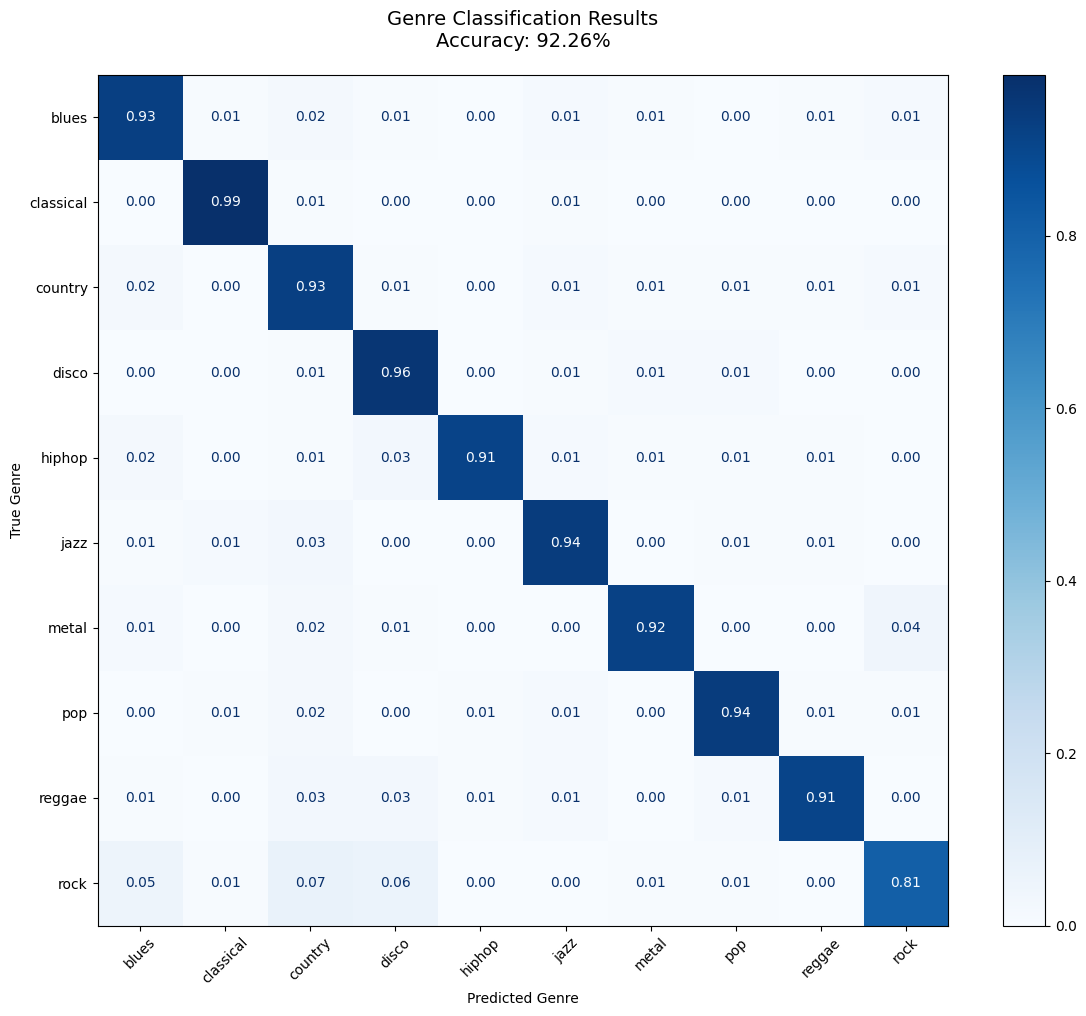


Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.93      0.91       150
   classical       0.97      0.99      0.98       150
     country       0.82      0.93      0.87       150
       disco       0.88      0.96      0.92       150
      hiphop       0.99      0.91      0.95       150
        jazz       0.92      0.94      0.93       149
       metal       0.96      0.92      0.94       150
         pop       0.95      0.94      0.94       150
      reggae       0.96      0.91      0.93       150
        rock       0.92      0.81      0.86       150

    accuracy                           0.92      1499
   macro avg       0.93      0.92      0.92      1499
weighted avg       0.93      0.92      0.92      1499



In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# Generate predictions for the test set (for hybrid model)
y_pred = model.predict([X_mfcc_test, X_other_test])  # Pass both inputs
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix and normalize it
conf_matrix = confusion_matrix(y_test, y_pred_labels, normalize='true')  # Normalize by true labels

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Larger size for readability
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45, values_format='.2f')  # Format values to 2 decimal places

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Adjust layout and labels
plt.title(f"Genre Classification Results\nAccuracy: {accuracy:.2%}", pad=20, fontsize=14)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Optional: Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=genre_labels))

MFCC train shape: (21651, 130, 13), Other features train shape: (21651, 798)
MFCC val shape: (1274, 130, 13), Other features val shape: (1274, 798)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 130, 13)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 130, 13)           │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional            │ (None, 130, 220)          │          25,960 │ dropout_6[0][0]            │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_5         │ (None, 130, 220)          │             880 │ masked_conditional[0][0]   │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu (PReLU)               │ (None, 130, 220)          │             220 │ batch_normalization_5[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 130, 220)          │               0 │ p_re_lu[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_1          │ (None, 130, 200)          │         396,200 │ dropout_7[0][0]            │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_6         │ (None, 130, 200)          │             800 │ masked_conditional_1[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_features_input          │ (None, 798)               │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu_1 (PReLU)             │ (None, 130, 200)          │             200 │ batch_normalization_6[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 798)               │               0 │ other_features_input[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 130, 200)          │               0 │ p_re_lu_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 128)               │         102,272 │ dropout_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_2          │ (None, 130, 180)          │         324,180 │ dropout_8[0][0]            │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 874,016 (3.33 MB)

 Trainable params: 872,300 (3.33 MB)

 Non-trainable params: 1,716 (6.70 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_features_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


677/677 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.2875 - loss: 2.3153 - val_accuracy: 0.5581 - val_loss: 1.6002 - learning_rate: 1.0000e-04
Epoch 2/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 68s 100ms/step - accuracy: 0.4847 - loss: 1.8409 - val_accuracy: 0.6334 - val_loss: 1.4173 - learning_rate: 1.0000e-04
Epoch 3/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 70s 104ms/step - accuracy: 0.5342 - loss: 1.6729 - val_accuracy: 0.6711 - val_loss: 1.2958 - learning_rate: 1.0000e-04
Epoch 4/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 70s 104ms/step - accuracy: 0.5795 - loss: 1.5267 - val_accuracy: 0.6688 - val_loss: 1.2238 - learning_rate: 1.0000e-04
Epoch 5/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 68s 100ms/step - accuracy: 0.5991 - loss: 1.4317 - val_accuracy: 0.7104 - val_loss: 1.0837 - learning_rate: 1.0000e-04
Epoch 6/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 65s 96ms/step - accuracy: 0.6147 - loss: 1.3608 - val_accuracy: 0.7473 - val_loss: 0.9967 - learning_rate: 1.0000e-04
Epoch 7/300
677/677 ━━━━━━━━━━━━━━━━━━━━ 66s 97ms/ste

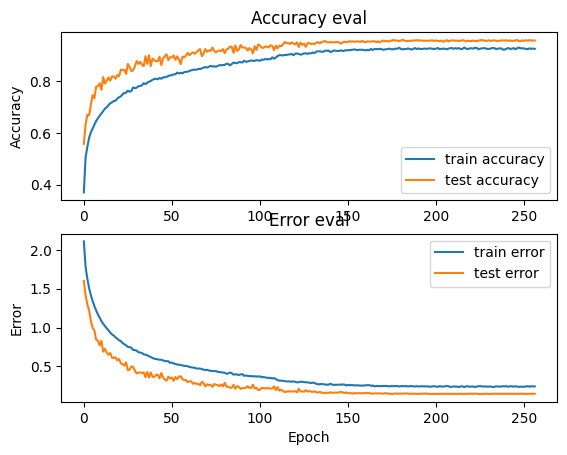

TypeError: predict() missing 1 required positional argument: 'y'

In [8]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, Concatenate
from tensorflow.keras.layers import PReLU, Layer, BatchNormalization
from tqdm import tqdm
import tensorflow as tf

# Configurations - Added USE_BATCH_NORM flag
class Config:
    MCLNN_LAYER_COUNT = 3
    DENSE_LAYER_COUNT = 2
    TOTAL_LAYER_COUNT = MCLNN_LAYER_COUNT + DENSE_LAYER_COUNT
    HIDDEN_NODES_LIST = [220, 200, 180]
    OTHER_FEATURES_NODES = [128, 64]
    DENSE_NODES = [50, 16]
    MASK_BANDWIDTH = [40, 10, 5]
    MASK_OVERLAP = [-10, 3, 1]
    LAYERS_ORDER_LIST = [4, 4, 4]
    LAYER_IS_MASKED = [True, True, True]
    DROPOUT = [0.01, 0.4, 0.2, 0.1, 0.2]
    OTHER_FEATURES_DROPOUT = [0.15, 0.15]
    WEIGHT_INITIALIZATION = ['he_normal', 'he_normal', 'he_normal', 'glorot_uniform', 'glorot_uniform']
    LEARNING_RATE = 0.0001
    USE_BATCH_NORM = True  # New flag to control batch normalization

# MaskedConditional Layer (unchanged)
class MaskedConditional(Layer):
    def __init__(self, output_dim, init='glorot_uniform', order=5, bandwidth=1, overlap=0, layer_is_masked=True, **kwargs):
        super(MaskedConditional, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.init = keras.initializers.get(init)
        self.order = order
        self.bandwidth = bandwidth
        self.overlap = overlap
        self.layer_is_masked = layer_is_masked

    def build(self, input_shape):
        input_dim = input_shape[-1]
        kernel_size = self.order * 2 + 1
        self.kernel_size = kernel_size

        self.W = self.add_weight(
            shape=(kernel_size, input_dim, self.output_dim),
            initializer=self.init,
            trainable=True,
            name='weights'
        )
        self.b = self.add_weight(
            shape=(self.output_dim,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )

        self.weightmask = self.construct_mask(
            input_dim, self.output_dim, self.bandwidth, self.overlap, self.layer_is_masked
        )
        self.weightmask = tf.expand_dims(self.weightmask, axis=0)
        self.weightmask = tf.tile(self.weightmask, [kernel_size, 1, 1])
        self.W.assign(self.W * self.weightmask)

        super(MaskedConditional, self).build(input_shape)

    def construct_mask(self, feature_count, hidden_count, bandwidth, overlap, layer_is_masked):
        bw = bandwidth
        ov = overlap
        l = feature_count
        e = hidden_count

        a = np.arange(1, bw + 1)
        g = np.arange(1, int(np.ceil((l * e) / (l + bw - ov))) + 1)

        if not layer_is_masked:
            binary_mask = np.ones([l, e])
        else:
            mask = np.zeros([l, e])
            flat_matrix = mask.flatten('F')

            for i in range(len(a)):
                for j in range(len(g)):
                    lx = a[i] + (g[j] - 1) * (l + bw - ov)
                    if lx <= l * e:
                        flat_matrix[lx - 1] = 1

            binary_mask = np.transpose(flat_matrix.reshape(e, l))

        return binary_mask.astype(np.float32)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        sequence_length = tf.shape(inputs)[1]
        feature_count = tf.shape(inputs)[2]

        padding = self.order
        padded_inputs = tf.pad(inputs, [[0, 0], [padding, padding], [0, 0]], mode='CONSTANT')

        outputs = tf.nn.conv1d(padded_inputs, self.W, stride=1, padding='VALID')
        outputs = outputs + self.b
        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], self.output_dim)

# Updated build_parallel_model with BatchNormalization
def build_parallel_model(mfcc_shape, other_features_dim, num_classes=10):
    # MFCC input branch
    mfcc_input = Input(shape=(mfcc_shape[0], mfcc_shape[1]), name='mfcc_input')
    x_mfcc = mfcc_input
    
    # Other features input branch
    other_input = Input(shape=(other_features_dim,), name='other_features_input')
    x_other = other_input
    
    # Process MFCC features through MCLNN layers with BatchNorm
    for layer_index in range(Config.MCLNN_LAYER_COUNT):
        x_mfcc = Dropout(Config.DROPOUT[layer_index])(x_mfcc)
        x_mfcc = MaskedConditional(
            init=Config.WEIGHT_INITIALIZATION[layer_index],
            output_dim=Config.HIDDEN_NODES_LIST[layer_index],
            order=Config.LAYERS_ORDER_LIST[layer_index],
            bandwidth=Config.MASK_BANDWIDTH[layer_index],
            overlap=Config.MASK_OVERLAP[layer_index],
            layer_is_masked=Config.LAYER_IS_MASKED[layer_index]
        )(x_mfcc)
        if Config.USE_BATCH_NORM:
            x_mfcc = BatchNormalization()(x_mfcc)
        x_mfcc = PReLU(shared_axes=[1])(x_mfcc)
    
    # Process other features through dense layers with BatchNorm
    for i, nodes in enumerate(Config.OTHER_FEATURES_NODES):
        x_other = Dropout(Config.OTHER_FEATURES_DROPOUT[i])(x_other)
        x_other = Dense(nodes, activation='relu')(x_other)
        if Config.USE_BATCH_NORM:
            x_other = BatchNormalization()(x_other)
    
    # Global pooling for MFCC features
    mfcc_features = GlobalAveragePooling1D()(x_mfcc)
    
    # Concatenate both feature streams
    combined = Concatenate()([mfcc_features, x_other])
    
    # Add final dense layers with BatchNorm
    for i in range(Config.DENSE_LAYER_COUNT):
        combined = Dropout(Config.DROPOUT[i + Config.MCLNN_LAYER_COUNT])(combined)
        combined = Dense(
            units=Config.DENSE_NODES[i],
            kernel_initializer=Config.WEIGHT_INITIALIZATION[i + Config.MCLNN_LAYER_COUNT]
        )(combined)
        if Config.USE_BATCH_NORM:
            combined = BatchNormalization()(combined)
        if i < Config.DENSE_LAYER_COUNT - 1:
            combined = PReLU()(combined)
        else:
            combined = Activation('softmax')(combined)
    
    model = Model(inputs=[mfcc_input, other_input], outputs=combined)
    optimiser = keras.optimizers.Adam(learning_rate=Config.LEARNING_RATE)
    model.compile(optimizer=optimiser, 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

# Main execution remains the same
if __name__ == "__main__":
    # Prepare datasets (now returns both MFCC and other features)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Squeeze the last dimension if it's 1 (remove unnecessary channels dimension)
    X_mfcc_train = X_mfcc_train.squeeze(-1)
    X_mfcc_val = X_mfcc_val.squeeze(-1)
    X_mfcc_test = X_mfcc_test.squeeze(-1)

    print(f"MFCC train shape: {X_mfcc_train.shape}, Other features train shape: {X_other_train.shape}")
    print(f"MFCC val shape: {X_mfcc_val.shape}, Other features val shape: {X_other_val.shape}")

    # Build and compile the model
    mfcc_shape = (X_mfcc_train.shape[1], X_mfcc_train.shape[2])
    other_features_dim = X_other_train.shape[1]
    model = build_parallel_model(mfcc_shape, other_features_dim)
    model.summary()

    # Add callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10)
    ]

    # Train the model
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=callbacks
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    plot_history(history)
    
    # Predict a sample from the test set
    X_mfcc_to_predict = X_mfcc_test[100][np.newaxis, ...]
    X_other_to_predict = X_other_test[100][np.newaxis, ...]
    y_to_predict = y_test[100]
    predict(model, [X_mfcc_to_predict, X_other_to_predict], y_to_predict)


True Genre: jazz
Predicted Genre: jazz
Confidence: 97.53%
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


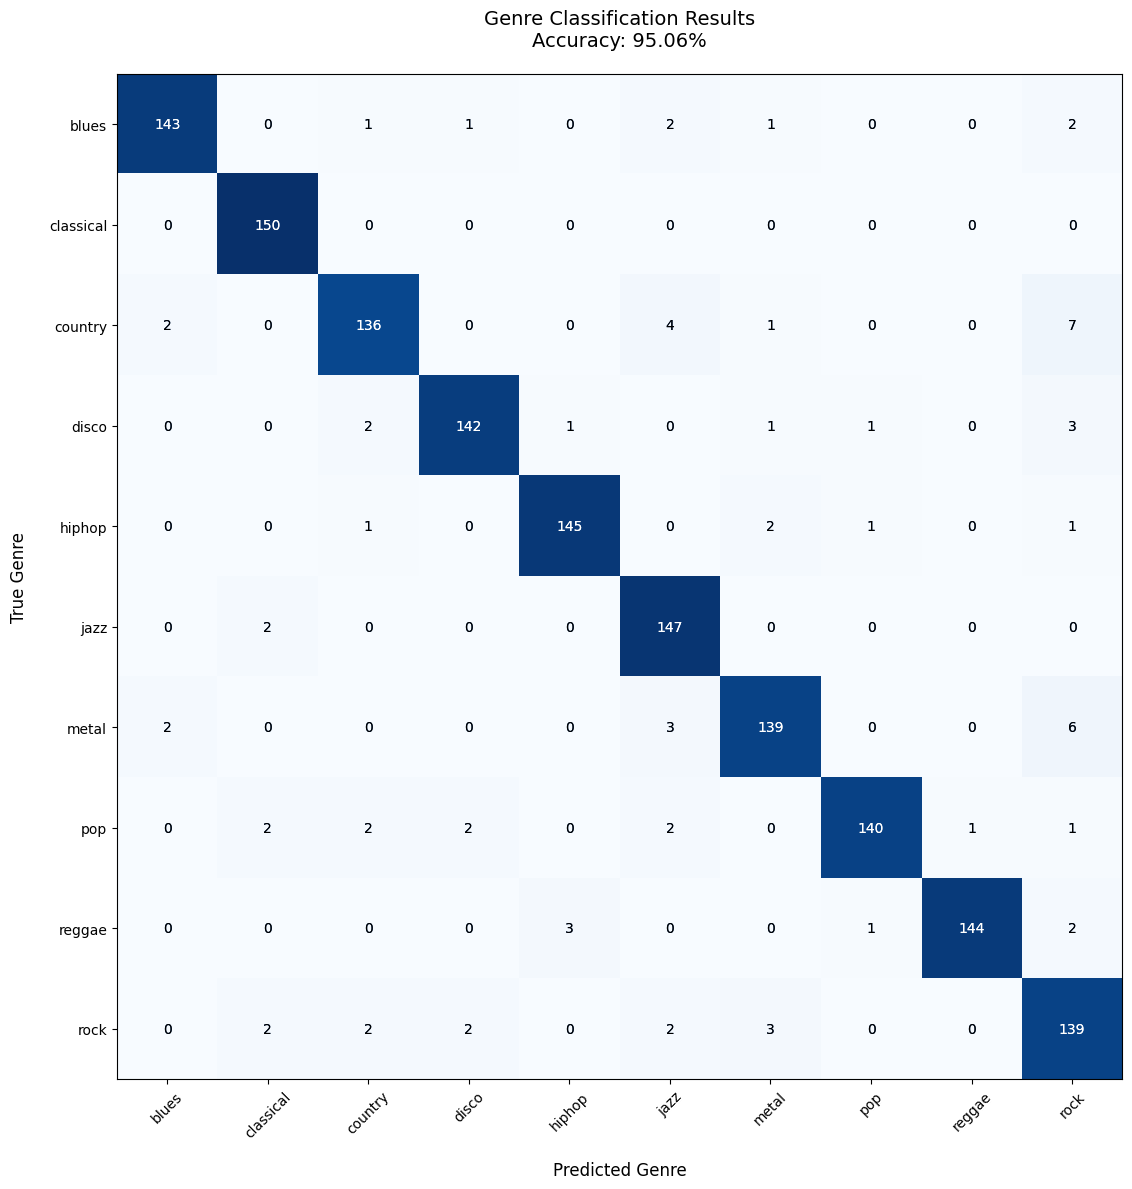


Class-wise Performance:
blues: 95.33% (150 samples)
classical: 100.00% (150 samples)
country: 90.67% (150 samples)
disco: 94.67% (150 samples)
hiphop: 96.67% (150 samples)
jazz: 98.66% (149 samples)
metal: 92.67% (150 samples)
pop: 93.33% (150 samples)
reggae: 96.00% (150 samples)
rock: 92.67% (150 samples)


In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# ================================================
# Load genre labels FIRST (before any plotting)
# ================================================
with open(JSON_PATH, "r") as fp:
    data = json.load(fp)
    genre_labels = data["mapping"]

# ================================================
# Single Sample Prediction Function
# ================================================
def predict(model, X_mfcc, X_other, y_true, genre_labels):
    # Reshape for batch prediction
    X_mfcc_batch = np.expand_dims(X_mfcc, axis=0)  # Shape: (1, timesteps, mfcc_features)
    X_other_batch = np.expand_dims(X_other, axis=0)  # Shape: (1, other_features_dim)
    
    # Get prediction
    prediction = model.predict([X_mfcc_batch, X_other_batch], verbose=0)
    predicted_label = np.argmax(prediction)
    
    print(f"\nTrue Genre: {genre_labels[y_true]}")
    print(f"Predicted Genre: {genre_labels[predicted_label]}")
    print(f"Confidence: {np.max(prediction) * 100:.2f}%")
    return predicted_label

# ================================================
# Test Prediction Example
# ================================================
sample_idx = 100  # Example index
predict(model, 
        X_mfcc_test[sample_idx], 
        X_other_test[sample_idx], 
        y_test[sample_idx],
        genre_labels)

# ================================================
# Full Test Set Evaluation
# ================================================
# Generate predictions
y_pred = model.predict([X_mfcc_test, X_other_test], verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Enhanced Confusion Matrix Plot
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(
    cmap='Blues',
    ax=plt.gca(),
    xticks_rotation=45,
    values_format='d',
    colorbar=False
)

# Formatting
plt.title(f"Genre Classification Results\nAccuracy: {accuracy:.2%}", pad=20, fontsize=14)
plt.xlabel("Predicted Genre", fontsize=12, labelpad=15)
plt.ylabel("True Genre", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Add accuracy text
for i in range(len(genre_labels)):
    for j in range(len(genre_labels)):
        plt.text(j, i, conf_matrix[i, j],
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

plt.tight_layout()
plt.show()

# Print class-wise accuracy
print("\nClass-wise Performance:")
for i, genre in enumerate(genre_labels):
    idx = y_test == i
    if sum(idx) > 0:  # Avoid division by zero
        acc = accuracy_score(y_test[idx], y_pred_labels[idx])
        print(f"{genre}: {acc:.2%} ({sum(idx)} samples)")

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step

Test Set Accuracy: 95.06%


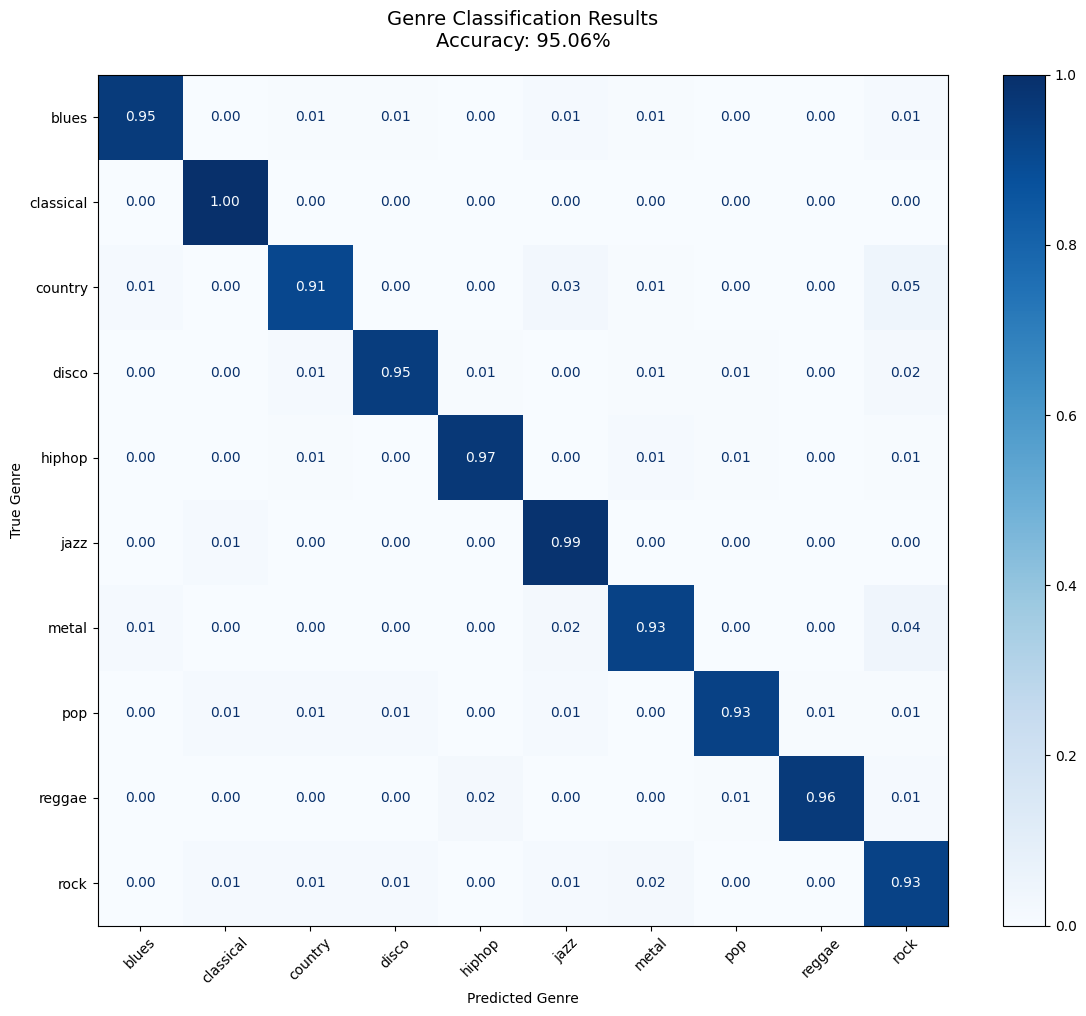


Classification Report:
              precision    recall  f1-score   support

       blues       0.97      0.95      0.96       150
   classical       0.96      1.00      0.98       150
     country       0.94      0.91      0.93       150
       disco       0.97      0.95      0.96       150
      hiphop       0.97      0.97      0.97       150
        jazz       0.92      0.99      0.95       149
       metal       0.95      0.93      0.94       150
         pop       0.98      0.93      0.96       150
      reggae       0.99      0.96      0.98       150
        rock       0.86      0.93      0.89       150

    accuracy                           0.95      1499
   macro avg       0.95      0.95      0.95      1499
weighted avg       0.95      0.95      0.95      1499



In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# Generate predictions for the test set (for hybrid model)
y_pred = model.predict([X_mfcc_test, X_other_test])  # Pass both inputs
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix and normalize it
conf_matrix = confusion_matrix(y_test, y_pred_labels, normalize='true')  # Normalize by true labels

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Larger size for readability
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=genre_labels
)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45, values_format='.2f')  # Format values to 2 decimal places

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Adjust layout and labels
plt.title(f"Genre Classification Results\nAccuracy: {accuracy:.2%}", pad=20, fontsize=14)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Optional: Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=genre_labels))

In [ ]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
import json
import os
import math
import librosa

In [4]:
import pandas as pd

# Track counts per genre
genre_counts = {'Classical': 642,
'Blues' :662,
'Hip-Hop' :2045,
'Ambient' :2985,
'Noise' :2870,
'Field Recordings' :1163,
'Old-Time / Historic' :187,
'Techno' :630,
'Jazz' :625,
'Country' :293,
'Drone' :744,
'Chiptune' :284,
'Garage' :773,
'Soul-RnB' :169,
'Reggae - Dub' :288,
'Punk' :1691,
}

# Target number of tracks per genre
target_tracks = 100


# Calculate multiplier for each genre
multipliers = {genre: target_tracks / count for genre, count in genre_counts.items()}

# Display the result
multipliers_df = pd.DataFrame(list(multipliers.items()), columns=["Genre", "Multiplier"])
print(multipliers_df)


                  Genre  Multiplier
0             Classical    0.155763
1                 Blues    0.151057
2               Hip-Hop    0.048900
3               Ambient    0.033501
4                 Noise    0.034843
5      Field Recordings    0.085985
6   Old-Time / Historic    0.534759
7                Techno    0.158730
8                  Jazz    0.160000
9               Country    0.341297
10                Drone    0.134409
11             Chiptune    0.352113
12               Garage    0.129366
13             Soul-RnB    0.591716
14         Reggae - Dub    0.347222
15                 Punk    0.059137
